# Extra√ß√£o e carregamento dos dados

In [58]:
# importa√ß√£o de bibliotecas
import pandas as pd

In [59]:
# Dataset armazenado no GitHub
url = 'https://raw.githubusercontent.com/liinedosanjos/Telecom---X---parte-2/refs/heads/main/telecom_tratado.csv'

In [60]:
# Carregando o CSV
df = pd.read_csv(url)

#visualiza√ß√£o inicial
df.head()

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  tenure PhoneService MultipleLines InternetService  ...  \
0                 Yes       9          Yes            No             DSL  ...   
1                  No       9          Yes           Yes             DSL  ...   
2                  No       4          Yes            No     Fiber optic  ...   
3                  No      13          Yes            No     Fiber optic  ...   
4                  No       3          Yes            No     Fiber optic  ...   

  StreamingTV StreamingMovies account_Contract account_PaperlessBilling  \
0         Yes              No         One year                      Yes   
1          No             Yes   Month-to-month                       No   
2          No              No   Month-to-month                      Yes   
3         Yes             Yes   Month-to-month                      Yes   
4         Yes              No   Month-to-month                      Yes   

  account_PaymentMethod MonthlyCharges TotalCharges Contas_Diarias Churn_num  \
0          Mailed check           65.6       593.30           2.19         0   
1          Mailed check           59.9       542.40           2.00         0   
2      Electronic check           73.9       280.85           2.46         1   
3      Electronic check           98.0      1237.85           3.27         1   
4          Mailed check           83.9       267.40           2.80         1   

   num_servicos  
0             5  
1             4  
2             3  
3             6  
4             4  

[5 rows x 24 columns]

In [61]:
print(df.columns)

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Contas_Diarias', 'Churn_num',
       'num_servicos'],
      dtype='object')



# Sele√ß√£o das vari√°veis relevantes

In [62]:
# Defini√ß√£o das colunas a serem usadas no modelo
colunas_modelo = [
    'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
    'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod',
    'MonthlyCharges', 'TotalCharges', 'Contas_Diarias', 'num_servicos', 'Churn_num'
]

df_modelo = df[colunas_modelo]
df_modelo.head()


customer_gender  customer_SeniorCitizen customer_Partner  \
0          Female                       0              Yes   
1            Male                       0               No   
2            Male                       0               No   
3            Male                       1              Yes   
4          Female                       1              Yes   

  customer_Dependents  tenure PhoneService MultipleLines InternetService  \
0                 Yes       9          Yes            No             DSL   
1                  No       9          Yes           Yes             DSL   
2                  No       4          Yes            No     Fiber optic   
3                  No      13          Yes            No     Fiber optic   
4                  No       3          Yes            No     Fiber optic   

  OnlineSecurity OnlineBackup  ... StreamingTV StreamingMovies  \
0             No          Yes  ...         Yes              No   
1             No           No  ...          No             Yes   
2             No           No  ...          No              No   
3             No          Yes  ...         Yes             Yes   
4             No           No  ...         Yes              No   

  account_Contract account_PaperlessBilling account_PaymentMethod  \
0         One year                      Yes          Mailed check   
1   Month-to-month                       No          Mailed check   
2   Month-to-month                      Yes      Electronic check   
3   Month-to-month                      Yes      Electronic check   
4   Month-to-month                      Yes          Mailed check   

  MonthlyCharges TotalCharges  Contas_Diarias  num_servicos  Churn_num  
0           65.6       593.30            2.19             5          0  
1           59.9       542.40            2.00             4          0  
2           73.9       280.85            2.46             3          1  
3           98.0      1237.85            3.27             6          1  
4           83.9       267.40            2.80             4          1  

[5 rows x 22 columns]

# Pr√©-processamento inicial

In [63]:
# Identifica√ß√£o vari√°veis categ√≥ricas (object)
cat_cols = df_modelo.select_dtypes(include=["object"]).columns
print("Vari√°veis categ√≥ricas:", cat_cols.tolist())

Vari√°veis categ√≥ricas: ['customer_gender', 'customer_Partner', 'customer_Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']


In [64]:
# Verificando os tipos das colunas
print(df_modelo.dtypes)

# Aplicando one-hot encoding
df_modelo = pd.get_dummies(df_modelo, drop_first=True)



customer_gender              object
customer_SeniorCitizen        int64
customer_Partner             object
customer_Dependents          object
tenure                        int64
PhoneService                 object
MultipleLines                object
InternetService              object
OnlineSecurity               object
OnlineBackup                 object
DeviceProtection             object
TechSupport                  object
StreamingTV                  object
StreamingMovies              object
account_Contract             object
account_PaperlessBilling     object
account_PaymentMethod        object
MonthlyCharges              float64
TotalCharges                float64
Contas_Diarias              float64
num_servicos                  int64
Churn_num                     int64
dtype: object


# An√°lise do balanceamento da vari√°vel alvo

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Propor√ß√£o de classes usando a vari√°vel num√©rica (0 = N√£o churn, 1 = Churn)
proporcao = df_modelo['Churn_num'].value_counts(normalize=True) * 100

print("üìä Propor√ß√£o de clientes por classe (%):")
print(proporcao.round(2))

üìä Propor√ß√£o de clientes por classe (%):
Churn_num
0    73.46
1    26.54
Name: proportion, dtype: float64


 Resultado: existe um desequil√≠brio moderado (maioria dos clientes n√£o cancelou). Isso pode impactar o desempenho dos modelos.

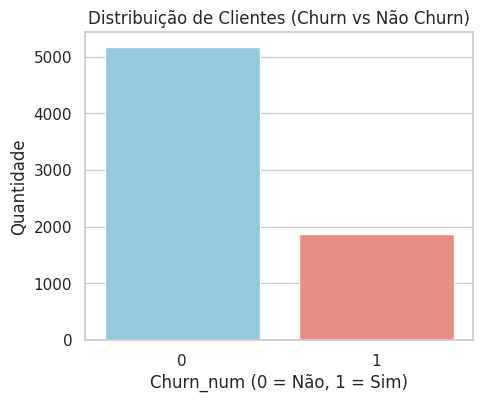

In [66]:
# Visualiza√ß√£o da distribui√ß√£o
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x="Churn_num", data=df_modelo, hue="Churn_num",
              palette=["skyblue","salmon"], legend=False)
plt.title("Distribui√ß√£o de Clientes (Churn vs N√£o Churn)")
plt.ylabel("Quantidade")
plt.xlabel("Churn_num (0 = N√£o, 1 = Sim)")
plt.show()




# An√°lise da correla√ß√£o

Correla√ß√£o das vari√°veis com Churn_num:
Churn_num                                        1.00
InternetService_Fiber optic                      0.31
account_PaymentMethod_Electronic check           0.30
Contas_Diarias                                   0.19
MonthlyCharges                                   0.19
account_PaperlessBilling_Yes                     0.19
customer_SeniorCitizen                           0.15
StreamingTV_Yes                                  0.06
StreamingMovies_Yes                              0.06
MultipleLines_Yes                                0.04
PhoneService_Yes                                 0.01
customer_gender_Male                            -0.01
MultipleLines_No phone service                  -0.01
num_servicos                                    -0.02
DeviceProtection_Yes                            -0.07
OnlineBackup_Yes                                -0.08
account_PaymentMethod_Mailed check              -0.09
account_PaymentMethod_Credit card (auto

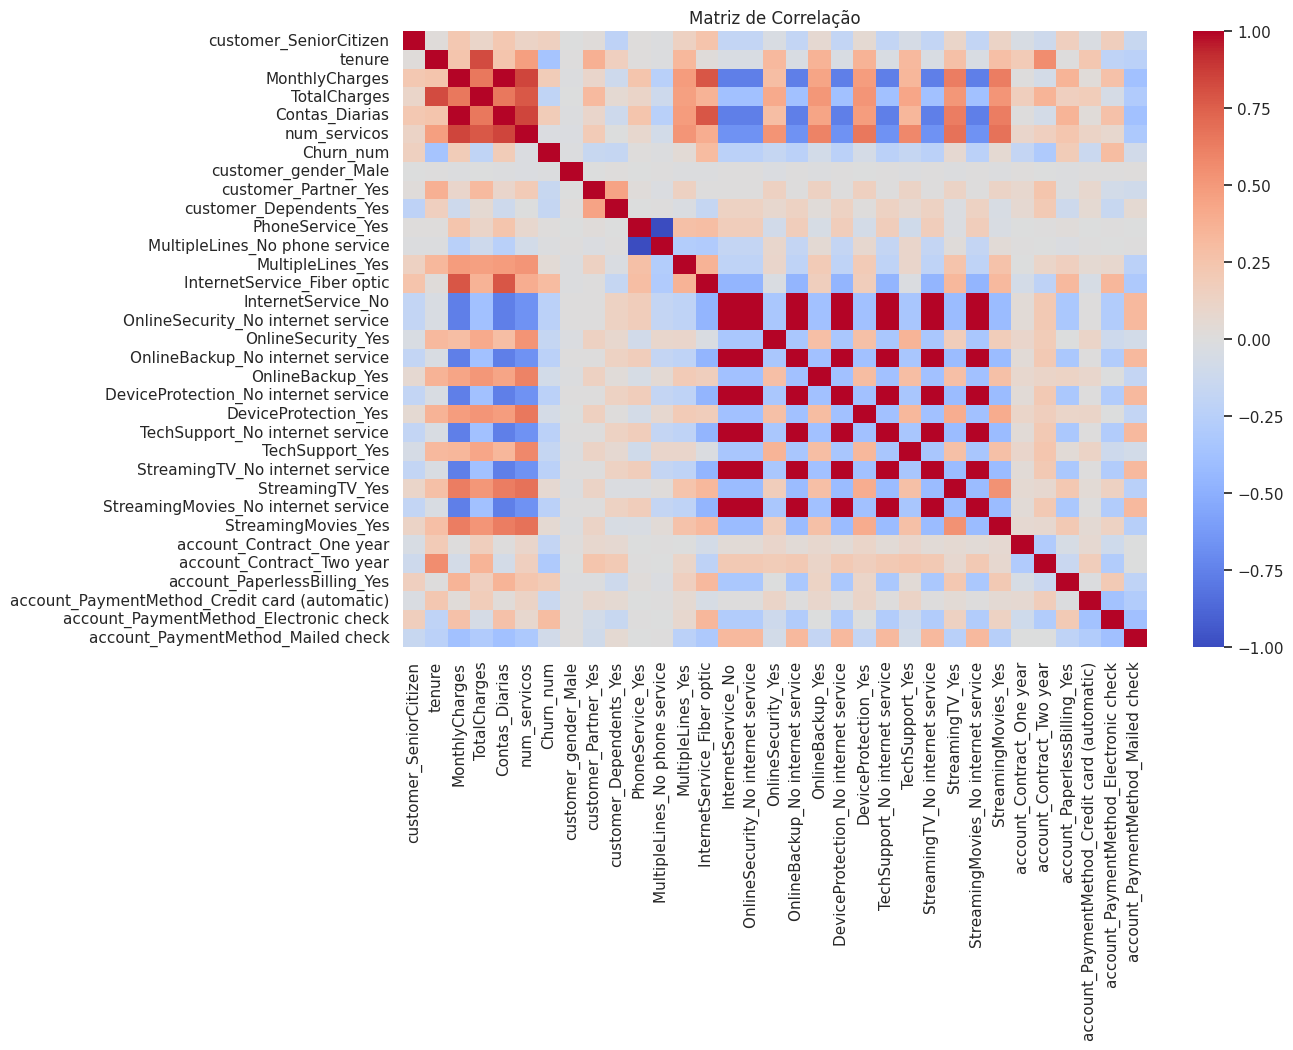

In [67]:
# Matriz de correla√ß√£o entre vari√°veis num√©ricas
corr = df_modelo.corr()

# Correla√ß√£o com a vari√°vel alvo (Churn_num)
corr_churn = corr["Churn_num"].sort_values(ascending=False)

print("Correla√ß√£o das vari√°veis com Churn_num:")
print(corr_churn.round(2))

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False, cbar=True)
plt.title("Matriz de Correla√ß√£o")
plt.show()


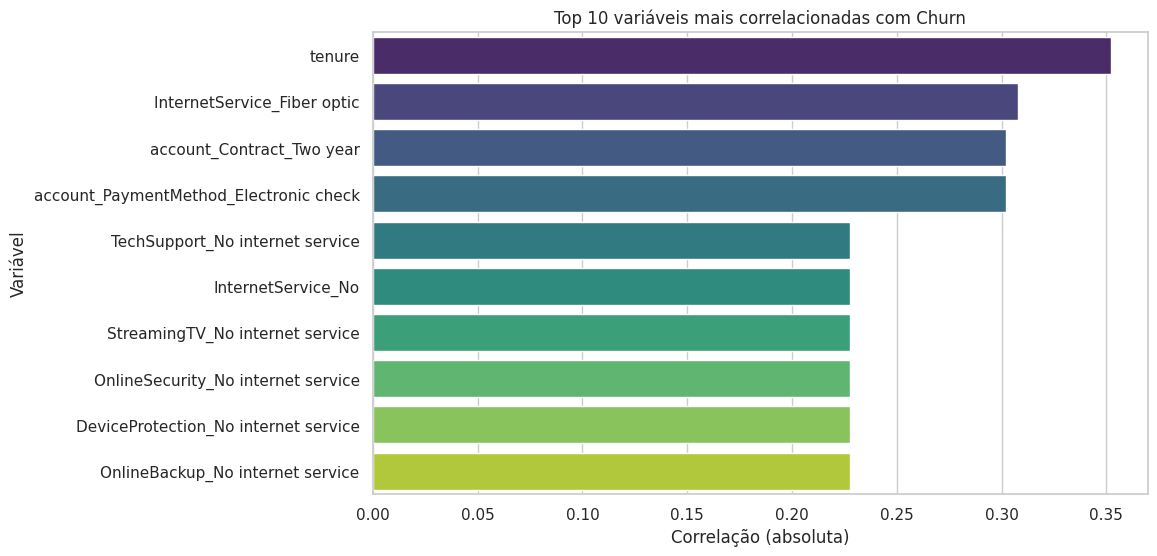

In [68]:
# Top 10 vari√°veis mais correlacionadas (positivas ou negativas)
top_corr = corr_churn.abs().sort_values(ascending=False).head(11).drop("Churn_num")

# Gr√°fico de barras
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_corr.values,
    y=top_corr.index,
    palette="viridis",
    hue=top_corr.index,
    legend=False
)
plt.title("Top 10 vari√°veis mais correlacionadas com Churn")
plt.xlabel("Correla√ß√£o (absoluta)")
plt.ylabel("Vari√°vel")
plt.show()


# Padroniza√ß√£o e prepara√ß√£o dos dados

In [69]:
from sklearn.preprocessing import StandardScaler

# Vari√°vel alvo
y = df_modelo['Churn_num']

# Sele√ß√£o de vari√°veis num√©ricas
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contas_Diarias', 'num_servicos']

# Sele√ß√£o de vari√°veis categ√≥ricas
cat_vars = df_modelo.drop(columns=num_vars + ['Churn_num']).columns.tolist()

# One-Hot Encoding j√° aplicado, agora padronizar vari√°veis num√©ricas
df_cat = pd.get_dummies(df_modelo[cat_vars], drop_first=True)

# Padronizar vari√°veis num√©ricas
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df_modelo[num_vars]), columns=num_vars)

# Concatenar dados num√©ricos e categ√≥ricos
X = pd.concat([df_num, df_cat], axis=1)

print("Dimens√µes do dataset pronto para ML:", X.shape)
X.head()


Dimens√µes do dataset pronto para ML: (7043, 32)


tenure  MonthlyCharges  TotalCharges  Contas_Diarias  num_servicos  \
0 -0.951682        0.027862     -0.744026        0.031231      0.369183   
1 -0.951682       -0.161583     -0.766482       -0.158198     -0.063239   
2 -1.155283        0.303720     -0.881874        0.300419     -0.495661   
3 -0.788800        1.104706     -0.459662        1.107982      0.801605   
4 -1.196004        0.636080     -0.887808        0.639396     -0.063239   

   customer_SeniorCitizen  customer_gender_Male  customer_Partner_Yes  \
0                       0                 False                  True   
1                       0                  True                 False   
2                       0                  True                 False   
3                       1                  True                  True   
4                       1                 False                  True   

   customer_Dependents_Yes  PhoneService_Yes  ...  \
0                     True              True  ...   
1                    False              True  ...   
2                    False              True  ...   
3                    False              True  ...   
4                    False              True  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                            False             True   
1                            False            False   
2                            False            False   
3                            False             True   
4                            False             True   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                 True   
2                                False                False   
3                                False                 True   
4                                False                False   

   account_Contract_One year  account_Contract_Two year  \
0                       True                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
4                      False                      False   

   account_PaperlessBilling_Yes  \
0                          True   
1                         False   
2                          True   
3                          True   
4                          True   

   account_PaymentMethod_Credit card (automatic)  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   account_PaymentMethod_Electronic check  account_PaymentMethod_Mailed check  
0                                   False                                True  
1                                   False                                True  
2                                    True                               False  
3                                    True                               False  
4                                   False                                True  

[5 rows x 32 columns]

# An√°lise direcionada (boxplots e scatterplots)


**Vari√°veis num√©ricas vs Churn**

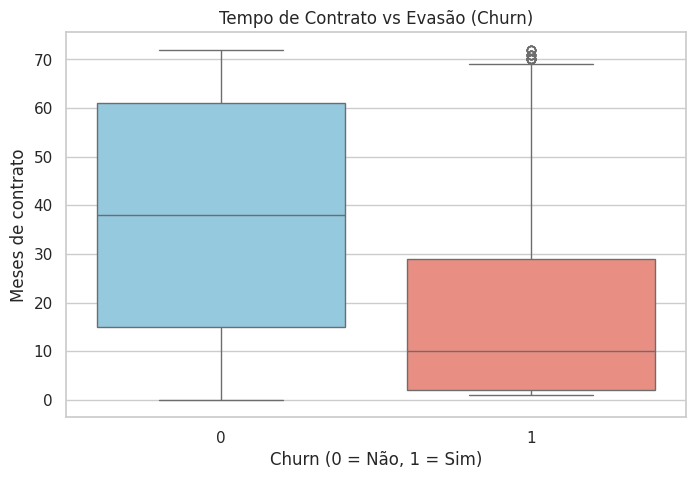

üìä Estat√≠sticas de tenure por Churn:
            count   mean    std  min   25%   50%   75%   max
Churn_num                                                   
0          5174.0  37.57  24.11  0.0  15.0  38.0  61.0  72.0
1          1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0


In [70]:
# Boxplot contrato vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Churn_num",
    y="tenure",
    data=df_modelo,
    hue="Churn_num",
    palette={0:"skyblue", 1:"salmon"},
    legend=False
)
plt.title("Tempo de Contrato vs Evas√£o (Churn)")
plt.xlabel("Churn (0 = N√£o, 1 = Sim)")
plt.ylabel("Meses de contrato")
plt.show()

print("üìä Estat√≠sticas de tenure por Churn:")
print(df_modelo.groupby("Churn_num")["tenure"].describe().round(2))


 Clientes que evadiram t√™m contratos mais curtos.

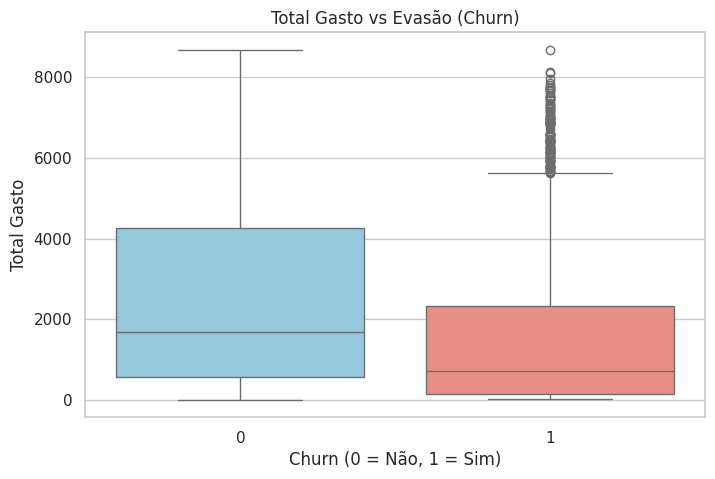


üìä Estat√≠sticas de TotalCharges por Churn:
            count     mean      std    min    25%      50%      75%      max
Churn_num                                                                   
0          5174.0  2549.91  2329.95   0.00  572.9  1679.52  4262.85  8672.45
1          1869.0  1531.80  1890.82  18.85  134.5   703.55  2331.30  8684.80


In [71]:
# Boxplot TotalCharges x churn
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Churn_num",
    y="TotalCharges",
    data=df_modelo,
    hue="Churn_num",
    palette={0:"skyblue", 1:"salmon"},
    legend=False
)
plt.title("Total Gasto vs Evas√£o (Churn)")
plt.xlabel("Churn (0 = N√£o, 1 = Sim)")
plt.ylabel("Total Gasto")
plt.show()

print("\nüìä Estat√≠sticas de TotalCharges por Churn:")
print(df_modelo.groupby("Churn_num")["TotalCharges"].describe().round(2))

 Clientes que evadiram gastaram menos em m√©dia.

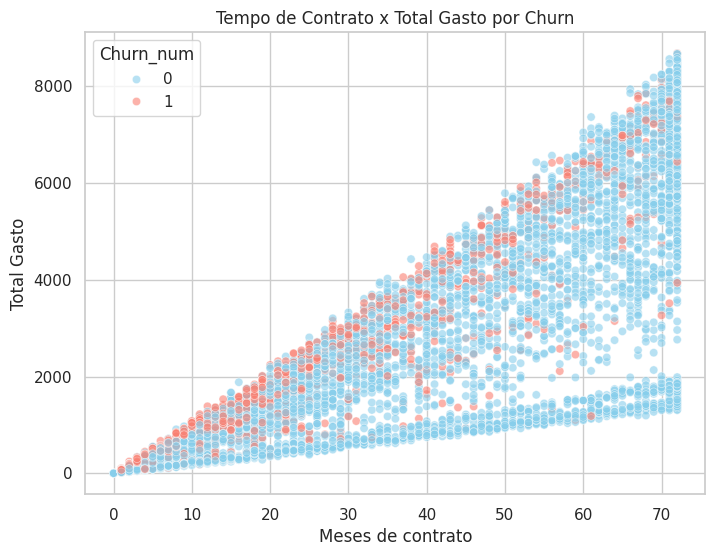

In [72]:
#Scatter tenure x TotalCharges
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="tenure",
    y="TotalCharges",
    hue="Churn_num",
    data=df_modelo,
    palette={0:"skyblue", 1:"salmon"},
    alpha=0.6
)
plt.title("Tempo de Contrato x Total Gasto por Churn")
plt.xlabel("Meses de contrato")
plt.ylabel("Total Gasto")
plt.show()


 Clientes fi√©is tendem a gastar mais ao longo do tempo.

# An√°lise detalhada de vari√°veis num√©ricas e categ√≥ricas

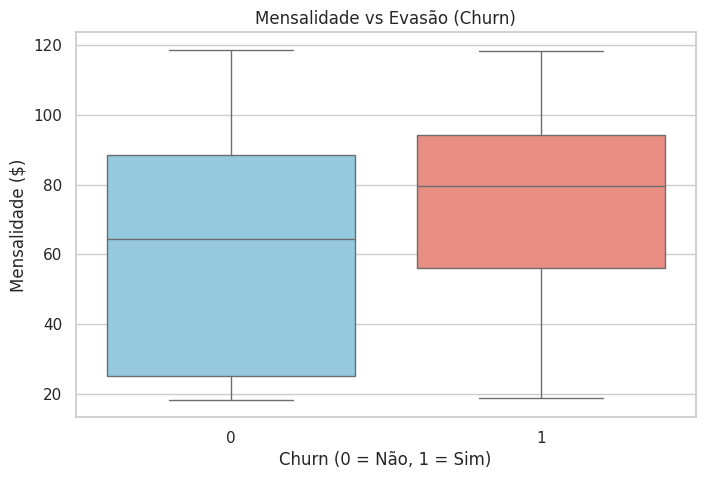

üìä Estat√≠sticas de MonthlyCharges por Churn:
            count   mean    std    min    25%    50%   75%     max
Churn_num                                                         
0          5174.0  61.27  31.09  18.25  25.10  64.43  88.4  118.75
1          1869.0  74.44  24.67  18.85  56.15  79.65  94.2  118.35


In [73]:
#Boxplot: Mensalidade vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df_modelo, x="Churn_num", y="MonthlyCharges", hue="Churn_num",
            palette=["skyblue","salmon"], legend=False)
plt.title("Mensalidade vs Evas√£o (Churn)")
plt.xlabel("Churn (0 = N√£o, 1 = Sim)")
plt.ylabel("Mensalidade ($)")
plt.show()

print("üìä Estat√≠sticas de MonthlyCharges por Churn:")
print(df_modelo.groupby("Churn_num")["MonthlyCharges"].describe().round(2))

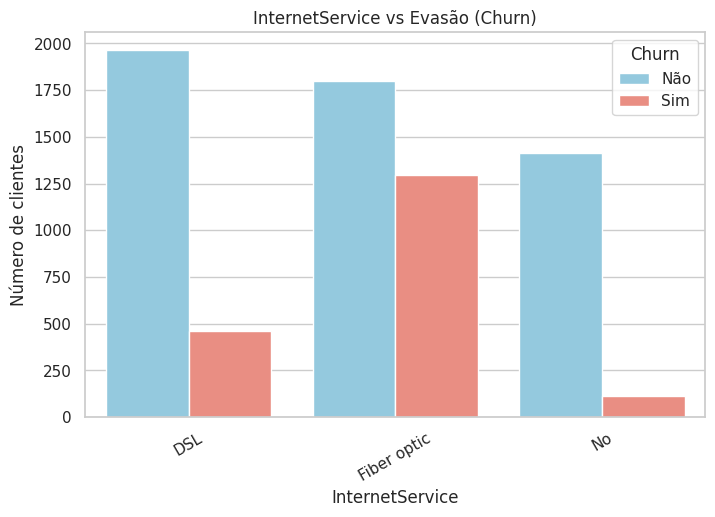

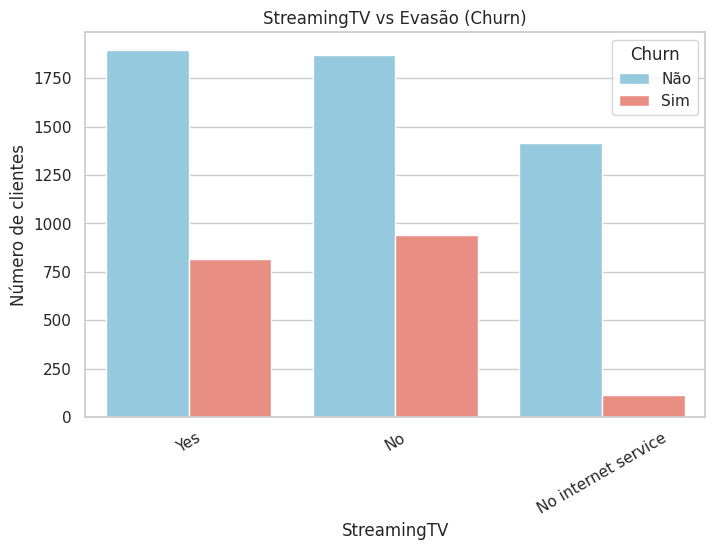

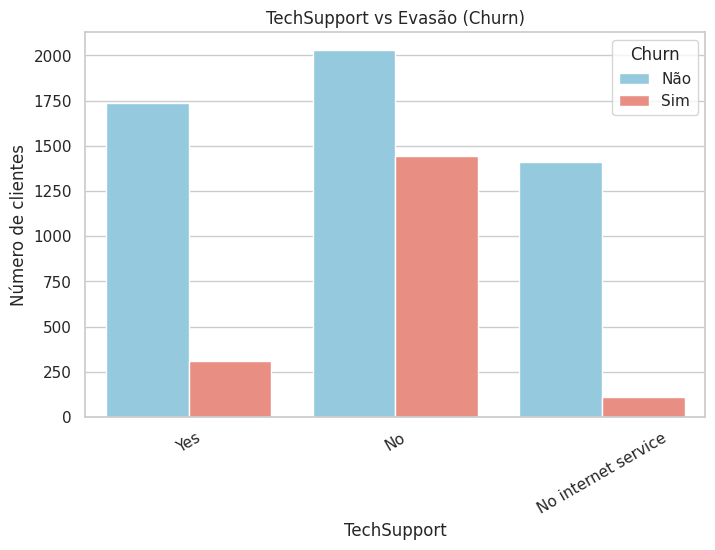

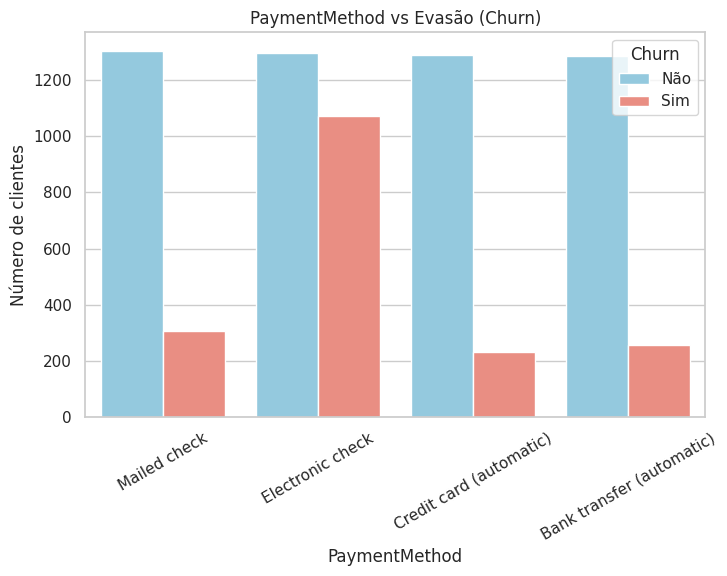

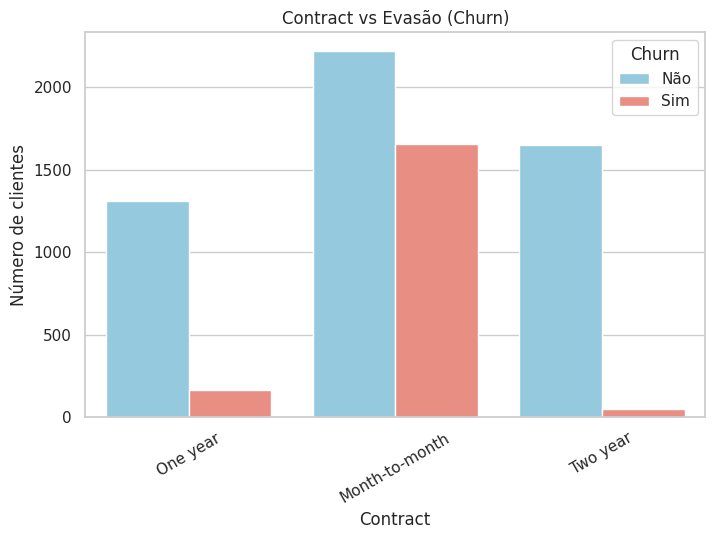

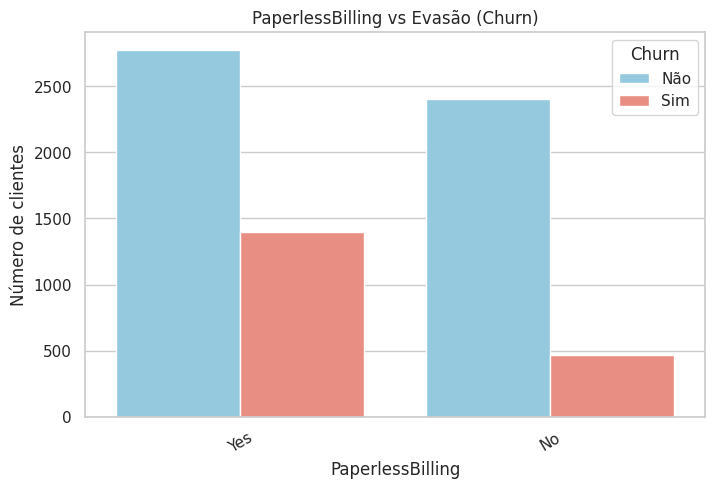

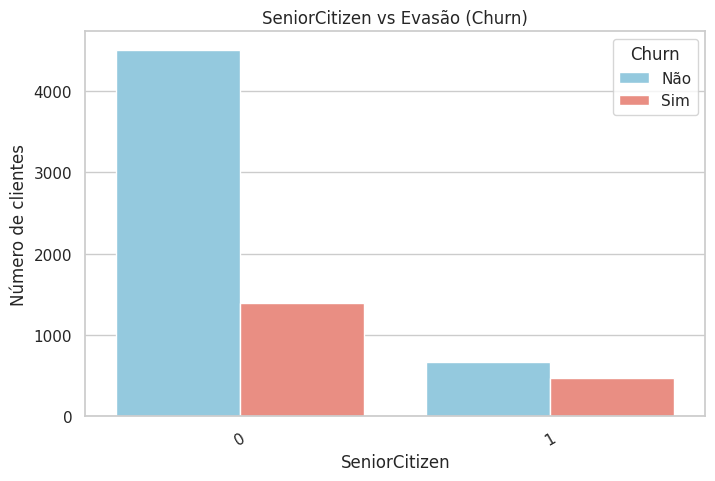

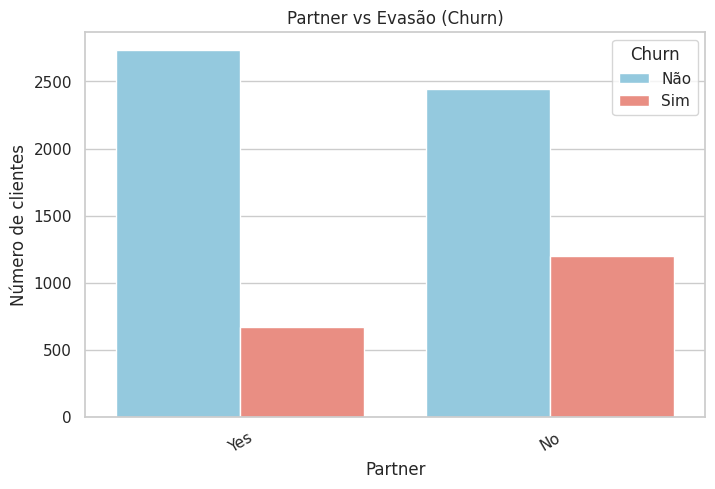

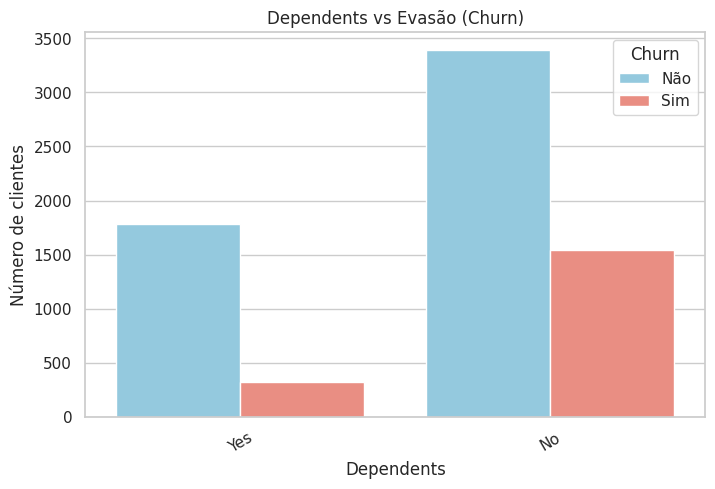

In [75]:
# Reconstruir colunas categ√≥ricas originais

# Recriar as colunas originais para visualiza√ß√£o
df_modelo['InternetService_orig'] = df[['InternetService']]
df_modelo['StreamingTV_orig'] = df[['StreamingTV']]
df_modelo['TechSupport_orig'] = df[['TechSupport']]
df_modelo['PaymentMethod_orig'] = df[['account_PaymentMethod']]
df_modelo['Contract_orig'] = df[['account_Contract']]
df_modelo['PaperlessBilling_orig'] = df[['account_PaperlessBilling']]
df_modelo['SeniorCitizen_orig'] = df[['customer_SeniorCitizen']]
df_modelo['Partner_orig'] = df[['customer_Partner']]
df_modelo['Dependents_orig'] = df[['customer_Dependents']]

# Countplots

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
cores = {0: "skyblue", 1: "salmon"}

# Lista de vari√°veis categ√≥ricas originais para plot
cat_vars_plot = [
    "InternetService_orig",
    "StreamingTV_orig",
    "TechSupport_orig",
    "PaymentMethod_orig",
    "Contract_orig",
    "PaperlessBilling_orig",
    "SeniorCitizen_orig",
    "Partner_orig",
    "Dependents_orig"
]

for var in cat_vars_plot:
    plt.figure(figsize=(8,5))
    sns.countplot(x=var, hue="Churn_num", data=df_modelo, palette=cores)
    plt.title(f"{var.replace('_orig','')} vs Evas√£o (Churn)")
    plt.xlabel(var.replace('_orig',''))
    plt.ylabel("N√∫mero de clientes")
    plt.legend(title="Churn", labels=["N√£o","Sim"])
    plt.xticks(rotation=30)
    plt.show()



# Modelagem preditiva
Separa√ß√£o de dados

In [76]:
from sklearn.model_selection import train_test_split

# Divis√£o treino/teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verificar tamanhos dos datasets
print(f"Tamanho X_train: {X_train.shape}")
print(f"Tamanho X_test:  {X_test.shape}")
print(f"Tamanho y_train: {y_train.shape}")
print(f"Tamanho y_test:  {y_test.shape}")


Tamanho X_train: (4930, 32)
Tamanho X_test:  (2113, 32)
Tamanho y_train: (4930,)
Tamanho y_test:  (2113,)


Separa√ß√£o de dados

**Regress√£o Log√≠stica (Logistic Regression)**

Tipo: modelo baseado em fun√ß√£o linear e dist√¢ncia.

Necessita normaliza√ß√£o, pois as features com escalas diferentes podem influenciar nos coeficientes e na converg√™ncia do algoritmo.

Justificativa: √© um modelo interpret√°vel, fornece probabilidades de churn e √© um bom baseline para classifica√ß√£o bin√°ria.

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Regress√£o Log√≠stica (com dados padronizados)
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("=== Regress√£o Log√≠stica ===")
print("Acur√°cia:", round(accuracy_score(y_test, y_pred_log), 3))
print("Relat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred_log))
print("Matriz de Confus√£o:\n", confusion_matrix(y_test, y_pred_log))


=== Regress√£o Log√≠stica ===
Acur√°cia: 0.798
Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Matriz de Confus√£o:
 [[1380  172]
 [ 254  307]]


**Random Forest**

Tipo: modelo baseado em √°rvores (ensemble de Decision Trees).

N√£o necessita normaliza√ß√£o, √°rvores n√£o s√£o sens√≠veis √† escala das features.

Justificativa: consegue capturar rela√ß√µes n√£o lineares e intera√ß√µes complexas entre vari√°veis, al√©m de lidar bem com features categ√≥ricas e num√©ricas sem necessidade de pr√©-processamento de escala.

In [79]:
# Random Forest (n√£o precisa normaliza√ß√£o)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")
print("Acur√°cia:", round(accuracy_score(y_test, y_pred_rf), 3))
print("Relat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred_rf))
print("Matriz de Confus√£o:\n", confusion_matrix(y_test, y_pred_rf))

=== Random Forest ===
Acur√°cia: 0.786
Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113

Matriz de Confus√£o:
 [[1384  168]
 [ 285  276]]


**Avalia√ß√£o dos modelos**

M√©tricas no conjunto de teste

| Modelo              |  Accuracy | Precis√£o (churn=1) | Recall (churn=1) | F1 (churn=1) |
| ------------------- | :-------: | :----------------: | :--------------: | :----------: |
| Regress√£o Log√≠stica | **0,798** |        0,64        |     **0,55**     |   **0,59**   |
| Random Forest       |   0,786   |        0,62        |       0,49       |     0,55     |


***Matrizes de confus√£o***

*  **Regress√£o Log√≠stica**


[[1380  172]
[ 254  307]]


*    172 FPs | 254 FNs

*  **Random Forest**

[[1384  168]
 [ 285  276]]

 *  168 FPs | 285 FNs




Foram aplicados dois modelos de Machine Learning para previs√£o da evas√£o de clientes:

Regress√£o Log√≠stica (com normaliza√ß√£o)

Random Forest (sem necessidade de normaliza√ß√£o)

üîπ Regress√£o Log√≠stica

Acur√°cia: 0.798

Precis√£o (classe 1 - evas√£o): 0.64

Recall (classe 1 - evas√£o): 0.55

F1-score (classe 1 - evas√£o): 0.59

Matriz de Confus√£o:

Verdadeiros Negativos: 1380

Falsos Positivos: 172

Falsos Negativos: 254

Verdadeiros Positivos: 307

üìå An√°lise:
A Regress√£o Log√≠stica apresentou boa capacidade de generaliza√ß√£o, com acur√°cia de quase 80%. Entretanto, observou-se maior dificuldade em identificar corretamente os clientes que ir√£o evadir (classe 1), j√° que o recall foi de apenas 0.55. Isso indica que parte dos clientes propensos a sair n√£o foi identificada.

üîπ Random Forest

Acur√°cia: 0.786

Precis√£o (classe 1 - evas√£o): 0.62

Recall (classe 1 - evas√£o): 0.49

F1-score (classe 1 - evas√£o): 0.55

Matriz de Confus√£o:

Verdadeiros Negativos: 1384

Falsos Positivos: 168

Falsos Negativos: 285

Verdadeiros Positivos: 276

üìå An√°lise:
O Random Forest apresentou desempenho semelhante √† Regress√£o Log√≠stica, mas com recall ainda menor (0.49), o que significa que deixou de identificar uma quantidade ainda maior de clientes que evadiriam.


###Compara√ß√£o Cr√≠tica dos Modelos

Ambos os modelos tiveram bom desempenho geral, com acur√°cia pr√≥xima de 80%.

A Regress√£o Log√≠stica se destacou levemente, principalmente no equil√≠brio entre precis√£o e recall.

Nenhum modelo apresentou sinais evidentes de overfitting (desempenho consistente), mas o recall relativamente baixo em ambos indica uma tend√™ncia a underfitting: os modelos ainda n√£o capturam completamente os padr√µes de evas√£o.

### **Melhorias imediatas sugeridas**
Regress√£o Log√≠stica: incluir mais vari√°veis, ajustar regulariza√ß√£o.

Random Forest: aumentar n√∫mero de √°rvores, ajustar profundidade m√°xima e balanceamento de classes.

Testar outros algoritmos como XGBoost, LightGBM ou SVM para capturar rela√ß√µes mais complexas.

# Interpreta√ß√µes e conclus√µes

### **An√°lise de import√¢ncia das vari√°veis**
**Regress√£o Log√≠stica:**

üìå Regress√£o Log√≠stica (coeficientes):
Destacaram-se como fatores associados ao risco de evas√£o:

MonthlyCharges (valor da mensalidade): valores altos aumentam risco de sa√≠da.

Contract (tipo de contrato): contratos mensais t√™m maior risco de evas√£o.

PaymentMethod (m√©todo de pagamento): cheque eletr√¥nico e fatura digital (sem papel) associados a maior evas√£o.

Servi√ßos adicionais (OnlineSecurity e TechSupport): aus√™ncia aumenta probabilidade de sa√≠da.

Tenure e TotalCharges: quanto maiores, menor o risco de evas√£o (clientes fidelizados).

üìå Random Forest (import√¢ncia das vari√°veis):
O modelo destacou as mesmas vari√°veis como mais relevantes:

Tenure e TotalCharges ‚Üí fideliza√ß√£o.

MonthlyCharges ‚Üí impacto direto na insatisfa√ß√£o.

Contract e PaymentMethod ‚Üí diferencia√ß√£o clara de perfis de risco.

OnlineSecurity e TechSupport ‚Üí aus√™ncia relacionada √† evas√£o.

**Principais fatores de evas√£o**

üìå Risco maior de evas√£o quando:

O valor da mensalidade (MonthlyCharges) √© elevado;

O cliente possui contrato mensal;

A fatura √© enviada em formato digital (sem papel);

O m√©todo de pagamento √© via cheque eletr√¥nico;

O cliente n√£o possui servi√ßos adicionais, como Seguran√ßa Online (OnlineSecurity) e Suporte T√©cnico (TechSupport).

üìå Risco menor de evas√£o quando:

O tempo de perman√™ncia (Tenure) na empresa √© alto;

O valor acumulado ao longo da rela√ß√£o (TotalCharges) √© elevado, indicando fideliza√ß√£o;

O cliente possui contratos de 1 ou 2 anos, que geram maior compromisso e estabilidade.


**An√°lise Complementar sobre Faturamento e Pagamento**

Pagamento por cheque eletr√¥nico e fatura digital (sem papel) aparecem associados √† evas√£o em v√°rias bases de telecom.

Em conjunto, esses fatores podem refletir perfis de clientes mais sens√≠veis a pre√ßo ou que tiveram experi√™ncias negativas de cobran√ßa, gerando percep√ß√£o de atrito e insatisfa√ß√£o.

# Conclus√£o geral

Os modelos confirmam que a evas√£o de clientes n√£o √© aleat√≥ria: ela est√° fortemente associada a perfil de pagamento, tipo de contrato e servi√ßos adicionais contratados.

üìå Estrat√©gias de reten√ß√£o sugeridas:

**Planos de fideliza√ß√£o:** incentivar contratos anuais ou bienais com benef√≠cios progressivos.

**Pol√≠tica de pre√ßos diferenciada:** oferecer descontos ou pacotes customizados para clientes com mensalidades altas.

**Servi√ßos adicionais como diferencial:** promover ades√£o a OnlineSecurity e TechSupport como forma de aumentar valor percebido.

**Melhoria na experi√™ncia de cobran√ßa:** revisar comunica√ß√£o e praticidade do faturamento digital e do pagamento via cheque eletr√¥nico.

**Programa de engajamento:** oferecer vantagens adicionais para clientes com longo tempo de casa, refor√ßando a fidelidade.

üëâ Assim, a Regress√£o Log√≠stica se mostrou ligeiramente superior ao Random Forest, mas ambos refor√ßam os mesmos fatores de risco e prote√ß√£o contra a evas√£o.
A empresa pode agir diretamente sobre contratos, pre√ßos, m√©todos de pagamento e servi√ßos adicionais para reduzir o churn e aumentar a fideliza√ß√£o*